# **Coronary Heart Diease Project Paper**
## Predictive modeling of CHD

Anwita Molaka, Emily Rothrock, Livvy Yurish, Sophie Phillips



# **Summary**


Coronary Heart Disease (CHD) is a type of heart disease where the arteries fail to deliver enough oxygenated blood to the heart, possibly leading to symptoms ranging from chest pain to heart attacks. It is usually caused by a build-up of plaque in the vessel wall that causes the coronary arteries to narrow, limiting blood flow. The purpose of this project is to build a predictive algorithm that can predict the likelihood a person develops CHD.


These models will be built using a subset of data from the Framingham Heart Study, split into a training and testing set. Tools learned in class such as k nearest neighbor, linear regression, and decision trees were explored to assess which model was the most viable. Through cleaning data, transforming variables, and building models, we attempted to uncover the highest possible R-squared value, or the model that is most suitable for a clinical setting. The idea of this approach is to train the model on the variable attributes/factors most correlated with developing CHD. Then, the model will be tested on its accuracy of prediciting the risk of CHD from an input of those specific variables from a different testing dataset.


Results: After running these various models, we found that _____ performed the best, with an R-squared value of _____ (or RMSE). This model used _____(variables/method) to predict the risk of CHD.



# **Data**

The data included the following 16 variables:

* sex : the recorded sex of the observationsm with 1 denoting an participant
coded as male
* age : Age at the time of medical examination in years.
* education: A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
* currentSmoker: Current cigarette smoking at the time of examinations
* cigsPerDay: Number of cigarettes smoked each day
* BPmeds: Use of Anti-hypertensive medication at exam
* prevalentStroke: Prevalent Stroke (0 = free of disease)
* prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
* diabetes: Diabetic according to criteria of first exam treated
* totChol: Total cholesterol (mg/dL)
* sysBP: Systolic Blood Pressure (mmHg)
* diaBP: Diastolic blood pressure (mmHg)
* BMI: Body Mass Index, weight (kg)/height (m)^2
* heartRate: Heart rate (beats/minute)
* glucose: Blood glucose level (mg/dL)
* TenYearCHD : The 10 year risk of coronary heart disease (CHD)

After further looking at these variables, the data could be categorized to a combination of behavioral variables, clinical attributes, and the 10 year risk of developing CHD. After categorizing these variables, it seems best to predict based on clinical attributes, rather than behavioral ones because that can be complicated as they can be intercorrelated with other clinical attributes.

## Key Variables

The key variables used for modeling were determined by first finding which were most strongly correlated.
The highest correlations were found to come from age, prevalentHyp, sysBP, glucose, diaBP and totChol, with the highest being age and sysBP. Their correlations are with the 10 year risk of coronary heart disease (TenYearCHD) is as follows:

*   Age (.235883)
*   prevalentHyp (0.220643)
* sysBP (0.251709)
* diaBP ((0.180052)

These specific variables were the ones that we further analyzed when going on to create the models.

## Analysis Preparation and Challenges

We tried multiple methods to clean and improve our dataset in order to increase the accuracy of models we created. This included getting rid of NaN values, replacing NaN values with the average of other values for that column, and scaling variables both with the sklearn preprocessing StandardScaler library and with logarithms. Scaling with the StandardScaler library for our linear regression model ended up making our model perform worse than just using the average on the given dataset, so that was abandoned. We did not need to cast any variables, since all of the key variables of interest were numeric values.

Our next step was looking at the outliers in the data to determine if any transformation needed to be done. The following variables exhibited major outliers, indicating that transformation was necessary:
* totChol
* sysBP
* diaBP
* BMI
* heartRate
* glucose

To transform these variables, logarithmic normalization was performed.

# **Results**

## kNN Model

When performing the kNN model, the highest correlations were found to come from age, prevalentHyp, sysBP, and diaBP. Using the elbow method, we determined the optimal k value was found to be 24. Using the variables above and  k=24 as parameters for the model, the resulting score was found to be 0.05853, so pretty inaccurate.

* INSERT explanation on results interpretation/implications

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [ ]:
# reading in training and testing data
train_data = pd.read_csv('fhs_train_cleaned.csv')
train_data = train_data.drop('Unnamed: 0',axis=1)

In [ ]:
test_data = pd.read_csv('fhs_test.csv')
test_data = test_data.rename(columns={'TenYearCHD': 'TEN_YEAR_CHD'}) # renames column
test_data = test_data.drop('Unnamed: 0',axis=1) # unnamed column that was some index that isn't needed
test_data = test_data[~test_data.isnull().any(axis=1)] # gets rid of all rows with np.nan values
test_data

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TEN_YEAR_CHD
1,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
4,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0
5,1,53,1.0,0,0.0,0.0,0,1,0,202.0,140.5,90.0,25.82,85.0,74.0,0
6,1,41,2.0,1,5.0,0.0,0,0,0,218.0,129.5,93.0,27.80,58.0,83.0,0
7,1,50,4.0,1,35.0,0.0,0,0,0,236.0,102.0,69.0,21.98,70.0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0,54,1.0,1,20.0,0.0,0,0,0,274.0,116.0,79.0,24.77,72.0,65.0,0
1055,0,63,2.0,0,0.0,0.0,0,1,0,184.0,196.0,101.0,28.27,86.0,82.0,1
1056,1,42,4.0,0,0.0,0.0,0,0,0,195.0,112.0,74.5,23.37,58.0,110.0,0
1057,1,63,3.0,0,0.0,0.0,0,1,0,161.0,196.0,102.0,28.43,56.0,88.0,0


In [ ]:
test_data.corr() # looks to see correlation between various variables

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TEN_YEAR_CHD
sex,1.000000,-0.008184,0.059335,0.209998,0.310308,-0.074139,-0.056433,-0.025371,0.004769,-0.051571,-0.084723,0.031030,0.064621,-0.128771,-0.025377,0.063633
age,-0.008184,1.000000,-0.139154,-0.205061,-0.170595,0.154252,0.032935,0.343572,0.145716,0.265086,0.393690,0.206948,0.118287,0.021491,0.158242,0.235883
education,0.059335,-0.139154,1.000000,0.040483,0.029951,-0.009616,-0.050864,-0.089315,-0.028616,-0.010134,-0.113686,-0.048286,-0.090300,-0.001512,-0.012671,-0.075425
currentSmoker,0.209998,-0.205061,0.040483,1.000000,0.786340,-0.034987,-0.031994,-0.108659,-0.074039,-0.120069,-0.113899,-0.116214,-0.104552,0.060502,-0.044028,0.053774
cigsPerDay,0.310308,-0.170595,0.029951,0.786340,1.000000,-0.041831,-0.044021,-0.069470,-0.052453,-0.070802,-0.091859,-0.079421,-0.065074,0.051819,-0.036637,0.056246
BPMeds,-0.074139,0.154252,-0.009616,-0.034987,-0.041831,1.000000,0.084397,0.285782,0.052511,0.111419,0.285149,0.176543,0.145520,0.066804,0.117862,0.070681
prevalentStroke,-0.056433,0.032935,-0.050864,-0.031994,-0.044021,0.084397,1.000000,0.106582,0.095174,0.038876,0.062074,0.073557,0.118421,0.009396,0.069377,0.066650
prevalentHyp,-0.025371,0.343572,-0.089315,-0.108659,-0.069470,0.285782,0.106582,1.000000,0.071383,0.178641,0.724027,0.617213,0.279844,0.150517,0.095514,0.220643
diabetes,0.004769,0.145716,-0.028616,-0.074039,-0.052453,0.052511,0.095174,0.071383,1.000000,0.036626,0.130404,0.070201,0.097631,0.081612,0.641001,0.072371
totChol,-0.051571,0.265086,-0.010134,-0.120069,-0.070802,0.111419,0.038876,0.178641,0.036626,1.000000,0.227760,0.230341,0.143764,0.129860,0.089138,0.024272


In [ ]:
correlated_columns = ['age', 'prevalentHyp', 'sysBP', 'diaBP'] # top four variables for correlation
for column in correlated_columns:
    print(test_data.loc[:,[column, 'TEN_YEAR_CHD']].groupby(column).describe()) # gets statistics related to the chosen four variables for analysis

    TEN_YEAR_CHD                                              
           count      mean       std  min  25%  50%   75%  max
age                                                           
34           4.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
35          10.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
36          22.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
37          27.0  0.074074  0.266880  0.0  0.0  0.0  0.00  1.0
38          27.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
39          40.0  0.050000  0.220721  0.0  0.0  0.0  0.00  1.0
40          44.0  0.113636  0.321038  0.0  0.0  0.0  0.00  1.0
41          30.0  0.066667  0.253708  0.0  0.0  0.0  0.00  1.0
42          38.0  0.078947  0.273276  0.0  0.0  0.0  0.00  1.0
43          36.0  0.055556  0.232311  0.0  0.0  0.0  0.00  1.0
44          42.0  0.047619  0.215540  0.0  0.0  0.0  0.00  1.0
45          31.0  0.096774  0.300537  0.0  0.0  0.0  0.00  1.0
46          42.0  0.119048  0.327770  0.0  0.0  0.0  0.

In [ ]:
X = test_data.loc[:,correlated_columns] # input values
y = test_data['TEN_YEAR_CHD'] # output values

In [ ]:
# function to max min normalize the data
def maxmin(df):
    df_norm = (df-min(df))/(max(df)-min(df))
    return df

X = X.apply(maxmin)

In [ ]:
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) )
test = [item for item in all if item not in train]

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

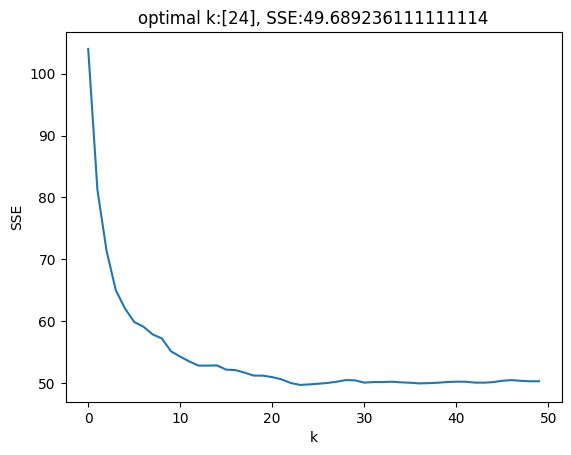

In [ ]:
# trying to find optimal k
k_bar = 50 # max number of k's to try
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar): # loops through all k variables
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]

plt.plot(np.arange(0,k_bar),SSE) # plot accuracy by k
plt.xlabel("k")
plt.title(f"optimal k:{k_star}, SSE:{SSE_min}")
plt.ylabel('SSE')
plt.show()

In [ ]:
# RESOURCES
# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

knn = KNeighborsRegressor(n_neighbors = 24) # optimal k is 24 from above plot
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=24)

In [ ]:
model = knn.predict(X_test) # making a prediction off the training test data
model

array([0.04166667, 0.25      , 0.16666667, 0.20833333, 0.20833333,
       0.29166667, 0.20833333, 0.08333333, 0.125     , 0.125     ,
       0.        , 0.04166667, 0.08333333, 0.08333333, 0.25      ,
       0.04166667, 0.125     , 0.20833333, 0.375     , 0.16666667,
       0.        , 0.04166667, 0.04166667, 0.08333333, 0.04166667,
       0.125     , 0.04166667, 0.125     , 0.        , 0.08333333,
       0.        , 0.125     , 0.16666667, 0.        , 0.33333333,
       0.08333333, 0.125     , 0.        , 0.04166667, 0.        ,
       0.        , 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.08333333, 0.125     , 0.08333333, 0.04166667, 0.16666667,
       0.08333333, 0.29166667, 0.08333333, 0.25      , 0.58333333,
       0.33333333, 0.        , 0.04166667, 0.16666667, 0.16666667,
       0.04166667, 0.        , 0.04166667, 0.04166667, 0.08333333,
       0.33333333, 0.08333333, 0.04166667, 0.08333333, 0.04166667,
       0.25      , 0.125     , 0.        , 0.125     , 0.29166

In [ ]:
knn.score(X_test, y_test) # seeing the accuracy

0.09597370774512626

In [ ]:
real_data_x_test = test_data.loc[:,correlated_columns]
real_data_y_test = test_data['TEN_YEAR_CHD']

In [ ]:
model = knn.predict(real_data_x_test) # making a prediction off the data from the actual test csv file

In [ ]:
knn.score(real_data_x_test, real_data_y_test) # shows the accuracy of the model

0.09148190578879978

## Linear Regression Model

When performing linear regression, the four most strongly correlated variables were looked at, as it was found that the use of more variables overfitted the data.

A few different combinations of these variables with regressions with and without and intercept were performed. The regression using all 4 of these variables, with and intercept, was found to be the best with and R-squared values of 0.081 and a RMSE fo 0.34.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_linear = pd.read_csv('fhs_train.csv')
df_linear = df_linear.drop('Unnamed: 0', axis=1) # drops unnecessary index column
df_linear_all = df_linear
df_linear = df_linear.loc[:, ['age', 'prevalentHyp', 'sysBP', 'diaBP', 'TenYearCHD']] # columns needed for training
df_linear

,age,prevalentHyp,sysBP,diaBP,TenYearCHD
0,58,0,143.0,104.0,1
1,40,0,122.0,82.0,0
2,52,0,112.0,71.0,0
3,38,1,130.0,94.0,0
4,43,0,124.0,92.0,0
...,...,...,...,...,...
3175,36,0,133.0,88.0,0
3176,47,0,137.0,91.0,0
3177,52,0,135.0,89.0,1
3178,48,0,117.0,73.0,0


In [ ]:
df_test_linear = pd.read_csv('fhs_test.csv')
df_test_linear = df_test_linear.drop('Unnamed: 0', axis=1) # drops unnecessary index column
df_linear_test_all = df_test_linear
df_test_linear = df_test_linear.loc[:, ['age', 'prevalentHyp', 'sysBP', 'diaBP', 'TenYearCHD']] # columns needed for training
df_test_linear

,age,prevalentHyp,sysBP,diaBP,TenYearCHD
0,58,0,126.0,77.0,0
1,51,0,135.0,83.0,0
2,44,1,147.5,96.0,1
3,40,0,138.5,88.0,1
4,58,0,110.0,80.0,0
...,...,...,...,...,...
1055,63,1,196.0,101.0,1
1056,42,0,112.0,74.5,0
1057,63,1,196.0,102.0,0
1058,55,0,136.5,87.5,0


In [ ]:
def fill_nas(df):
    columns = df.columns
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

In [ ]:
# Handle NAs by filling them in with estimated values:
df_linear = fill_nas(df_linear)
df_test_linear = fill_nas(df_test_linear)

### Linear Regression with a MinMax function

A few different combinations of these variables with regressions with and without and intercept were performed. The regression using all 4 of these variables, with and intercept, was found to be the best with and R-squared values of 0.081 and a RMSE fo 0.34.

In [ ]:
## Linear Regression:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data for random forest:
X_train = df_linear.drop('TenYearCHD',axis=1)
y_train = df_linear['TenYearCHD']
X_test = df_test_linear.drop('TenYearCHD',axis=1)
y_test = df_test_linear['TenYearCHD']

# min/max scales the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

# code used for trying different data transformating techniques
model = LinearRegression() # Build a random forest model
rf = model.fit(X_train_scaled,y_train) # Fit the rf model
y_hat = rf.predict(X_test_scaled) # Model predictions

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

0.07983897236123427


In [ ]:
## Linear Regression:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data for random forest:
X_train = df_linear.drop('TenYearCHD',axis=1)
y_train = df_linear['TenYearCHD']
X_test = df_test_linear.drop('TenYearCHD',axis=1)
y_test = df_test_linear['TenYearCHD']

# Fit model:
model = LinearRegression() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model
y_hat = rf.predict(X_test) # Model predictions

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

0.07983897236123427


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_linear = pd.read_csv('fhs_train.csv')
df_linear = df_linear.drop('Unnamed: 0', axis=1)
df_linear = df_linear.loc[:, ['education', 'age', 'prevalentHyp', 'sysBP', 'glucose', 'diaBP', 'totChol', 'TenYearCHD']]
df_test_linear = pd.read_csv('fhs_test.csv')
df_test_linear = df_test_linear.drop('Unnamed: 0', axis=1)
df_test_linear = df_test_linear.loc[:, ['education', 'age', 'prevalentHyp', 'sysBP', 'glucose', 'diaBP', 'totChol', 'TenYearCHD']]

def fill_nas(df):
    columns = df.columns
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

df_linear = fill_nas(df_linear)
df_test_linear = fill_nas(df_test_linear)

df_linear['totChol_log'] = np.log(df_linear['totChol'])
df_linear['glucose_log'] = np.log(df_linear['glucose'])
df_linear['diaBP_log'] = np.log(df_linear['diaBP'])
df_linear['sysBP_log'] = np.log(df_linear['sysBP'])
df_linear['age_log'] = np.log(df_linear['age'])
df_linear['education_log'] = np.log(df_linear['education'])

df_test_linear['totChol_log'] = np.log(df_test_linear['totChol'])
df_test_linear['glucose_log'] = np.log(df_test_linear['glucose'])
df_test_linear['diaBP_log'] = np.log(df_test_linear['diaBP'])
df_test_linear['sysBP_log'] = np.log(df_test_linear['sysBP'])
df_test_linear['age_log'] = np.log(df_test_linear['age'])
df_test_linear['education_log'] = np.log(df_test_linear['education'])

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X_train = df_linear.drop('TenYearCHD',axis=1)
y_train = df_linear['TenYearCHD']
X_test = df_test_linear.drop('TenYearCHD',axis=1)
y_test = df_test_linear['TenYearCHD']

model = LinearRegression() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model
y_hat = rf.predict(X_test) # Model predictions

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

0.0871269137527616


# Decision Tree Model

### Decision Tree - Round 1

When performing the decision tree model, the entire dataset was first used for analysis to get a general overview of the patterns in the data, as well as what the model could look like. Without specification of a depth, there was great overfitting observed by the model. Thus, various depths were then used for experimentation to determine the model of best fit.

The best R-squared value from this model was around 0.0616, observed at a depth of 3.

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
#! git clone https://github.com/DS3001/project_chd
data = pd.read_csv('/content/project_chd/fhs_train.csv')
data = data.drop("Unnamed: 0", axis = 1)
test_data = pd.read_csv('/content/project_chd/fhs_test.csv')
test_data = test_data.drop("Unnamed: 0", axis = 1)

data.head()

Cloning into 'project_chd'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 16 (delta 6), reused 6 (delta 4), pack-reused 6
Receiving objects: 100% (16/16), 754.81 KiB | 5.85 MiB/s, done.
Resolving deltas: 100% (6/6), done.


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [3]:
test_data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [4]:
# Drop NAs
data = data.dropna()
test_data = test_data.dropna()

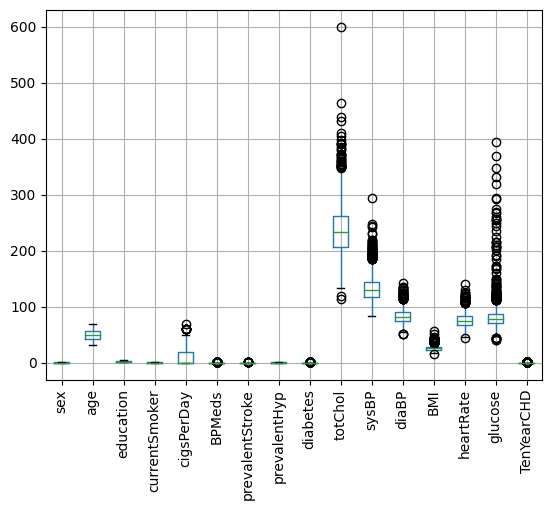

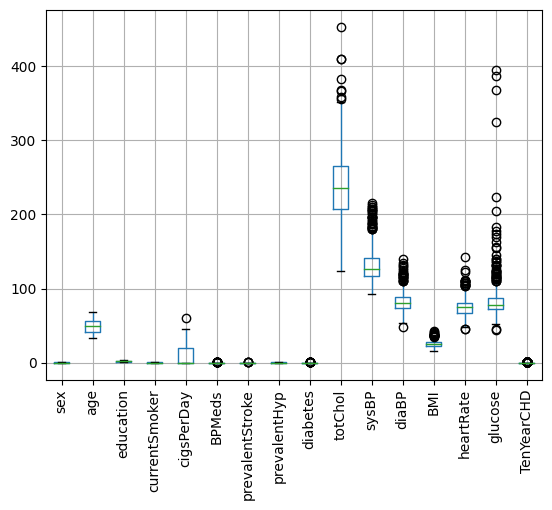

In [5]:
# Look at outliers
data.boxplot(rot = 90)
plt.show()

test_data.boxplot(rot = 90)
plt.show()

In [6]:
# Log transformation
data['totChol_log'] = np.log(data['totChol'])
data['sysBP_log'] = np.log(data['sysBP'])
data['diaBP_log'] = np.log(data['diaBP'])
data['BMI_log'] = np.log(data['BMI'])
data['heartRate_log'] = np.log(data['heartRate'])
data['glucose_log'] = np.log(data['glucose'])

test_data['totChol_log'] = np.log(test_data['totChol'])
test_data['sysBP_log'] = np.log(test_data['sysBP'])
test_data['diaBP_log'] = np.log(test_data['diaBP'])
test_data['BMI_log'] = np.log(test_data['BMI'])
test_data['heartRate_log'] = np.log(test_data['heartRate'])
test_data['glucose_log'] = np.log(test_data['glucose'])

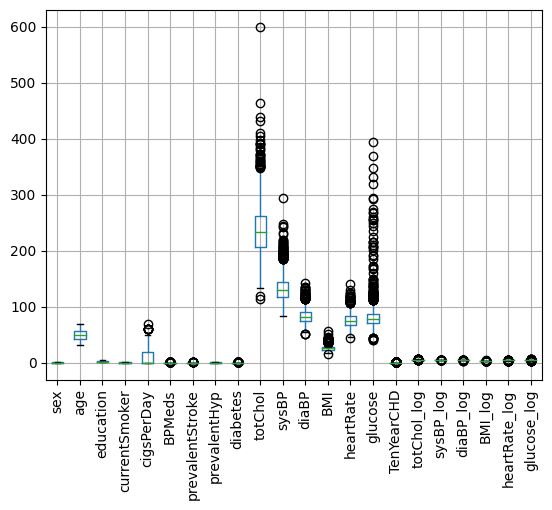

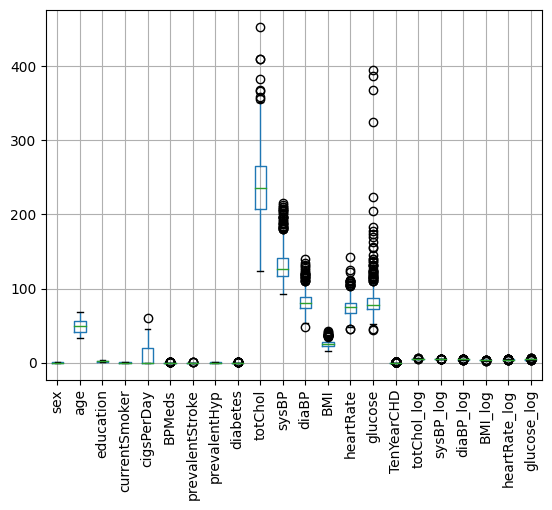

In [7]:
# View boxplots again
data.boxplot(rot = 90)
plt.show()

test_data.boxplot(rot = 90)
plt.show()

### Decision Tree


[Text(0.5550273989620141, 0.9807692307692307, 'x[1] <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.296250414090106, 0.9423076923076923, 'x[1] <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.1437720848056537, 0.9038461538461539, 'x[15] <= 5.988\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.1409452296819788, 0.8653846153846154, 'x[4] <= 9.5\nsquared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.07095848056537102, 0.8269230769230769, 'x[10] <= 199.75\nsquared_error = 0.034\nsamples = 599\nvalue = 0.035'),
 Text(0.06813162544169611, 0.7884615384615384, 'x[20] <= 5.438\nsquared_error = 0.032\nsamples = 598\nvalue = 0.033'),
 Text(0.0653047703180212, 0.75, 'x[17] <= 4.082\nsquared_error = 0.031\nsamples = 597\nvalue = 0.032'),
 Text(0.04814487632508834, 0.7115384615384616, 'x[12] <= 24.975\nsquared_error = 0.222\nsamples = 3\nvalue = 0.333'),
 Text(0.04531802120141343, 0.6730769230769231, 'squared_error = 0.0\nsa

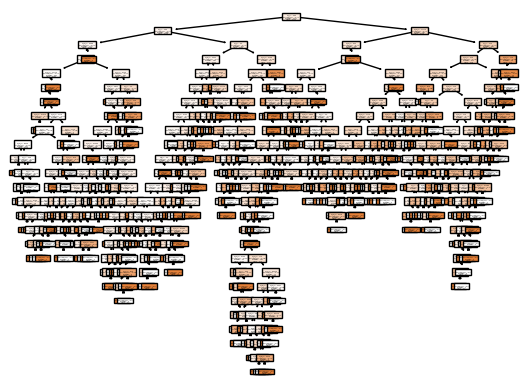

In [8]:
# Decision Tree

# Import packages and libraries
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor()
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True)

In [9]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.8466291789248763


This tree is very overfitting and is probably making splits on very small distinctions among a few observations, so we can truncate it and limit depth.

### Max Depth - 5

[Text(0.5028409090909091, 0.9166666666666666, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.23863636363636365, 0.75, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.11363636363636363, 0.5833333333333334, 'totChol_log <= 5.988\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.09090909090909091, 0.4166666666666667, 'cigsPerDay <= 9.5\nsquared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.045454545454545456, 0.25, 'glucose_log <= 5.438\nsquared_error = 0.034\nsamples = 599\nvalue = 0.035'),
 Text(0.022727272727272728, 0.08333333333333333, 'squared_error = 0.032\nsamples = 598\nvalue = 0.033'),
 Text(0.06818181818181818, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.13636363636363635, 0.25, 'diaBP <= 97.25\nsquared_error = 0.091\nsamples = 546\nvalue = 0.101'),
 Text(0.11363636363636363, 0.08333333333333333, 'squared_error = 0.083\nsamples = 515\nvalue = 0.091'),
 Text(0.

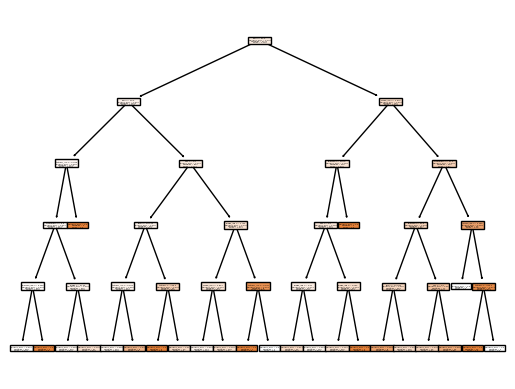

In [10]:
# Another Decision Tree, but with a limited depth

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 5)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [11]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.05216352012808434


### Max Depth - 3

[Text(0.5, 0.875, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.25, 0.625, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.125, 0.375, 'totChol <= 398.5\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.0625, 0.125, 'squared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.375, 0.375, 'sex <= 0.5\nsquared_error = 0.136\nsamples = 841\nvalue = 0.162'),
 Text(0.3125, 0.125, 'squared_error = 0.097\nsamples = 466\nvalue = 0.109'),
 Text(0.4375, 0.125, 'squared_error = 0.175\nsamples = 375\nvalue = 0.227'),
 Text(0.75, 0.625, 'sysBP <= 144.75\nsquared_error = 0.201\nsamples = 756\nvalue = 0.278'),
 Text(0.625, 0.375, 'glucose_log <= 5.34\nsquared_error = 0.164\nsamples = 426\nvalue = 0.207'),
 Text(0.5625, 0.125, 'squared_error = 0.159\nsamples = 422\nvalue = 0.199'),
 Text(0.6875, 0.125, 'squared_error = 0.0\nsamples = 4\nvalue = 1.0'),


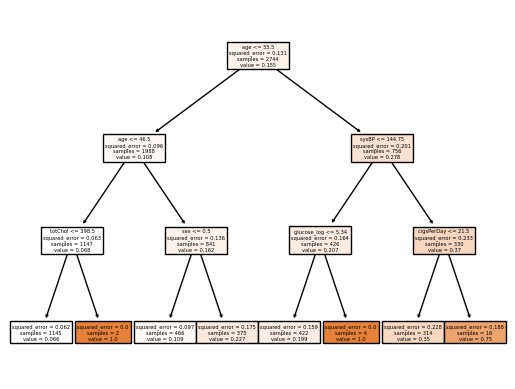

In [12]:
# Let's try to make it even better!

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 3)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [13]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.06161407743229941


### Max Depth - 10

[Text(0.4846340880102041, 0.9545454545454546, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.20244738520408162, 0.8636363636363636, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.07716836734693877, 0.7727272727272727, 'totChol_log <= 5.988\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.07206632653061225, 0.6818181818181818, 'cigsPerDay <= 9.5\nsquared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.03443877551020408, 0.5909090909090909, 'sysBP_log <= 5.297\nsquared_error = 0.034\nsamples = 599\nvalue = 0.035'),
 Text(0.029336734693877552, 0.5, 'glucose <= 233.5\nsquared_error = 0.032\nsamples = 598\nvalue = 0.033'),
 Text(0.02423469387755102, 0.4090909090909091, 'diaBP <= 59.25\nsquared_error = 0.031\nsamples = 597\nvalue = 0.032'),
 Text(0.01020408163265306, 0.3181818181818182, 'BMI <= 24.975\nsquared_error = 0.222\nsamples = 3\nvalue = 0.333'),
 Text(0.00510204081632653, 0.22727272727272727, 'squa

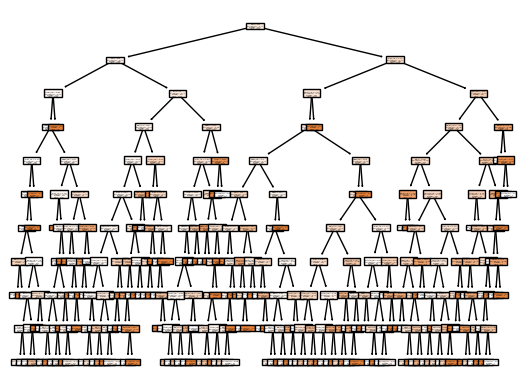

In [14]:
# Trying to improve r^2 value

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 10)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [15]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.22297073455216587


### Max Depth - 7

[Text(0.5224184782608695, 0.9375, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.2452445652173913, 0.8125, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.08967391304347826, 0.6875, 'totChol_log <= 5.988\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.07880434782608696, 0.5625, 'cigsPerDay <= 9.5\nsquared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.043478260869565216, 0.4375, 'glucose <= 233.5\nsquared_error = 0.034\nsamples = 599\nvalue = 0.035'),
 Text(0.03260869565217391, 0.3125, 'sysBP <= 199.75\nsquared_error = 0.032\nsamples = 598\nvalue = 0.033'),
 Text(0.021739130434782608, 0.1875, 'diaBP_log <= 4.082\nsquared_error = 0.031\nsamples = 597\nvalue = 0.032'),
 Text(0.010869565217391304, 0.0625, 'squared_error = 0.222\nsamples = 3\nvalue = 0.333'),
 Text(0.03260869565217391, 0.0625, 'squared_error = 0.029\nsamples = 594\nvalue = 0.03'),
 Text(0.043478260869565216, 0.1875, 'squared_error = 0.0\

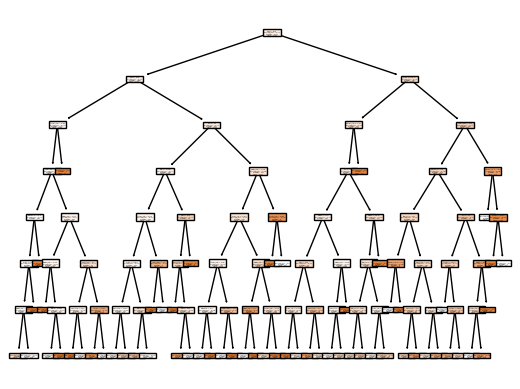

In [16]:
# Trying again

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 7)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [17]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.055442457325462824


### Max Depth - 2

[Text(0.5, 0.8333333333333334, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.25, 0.5, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.136\nsamples = 841\nvalue = 0.162'),
 Text(0.75, 0.5, 'sysBP_log <= 4.975\nsquared_error = 0.201\nsamples = 756\nvalue = 0.278'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.164\nsamples = 426\nvalue = 0.207'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.233\nsamples = 330\nvalue = 0.37')]

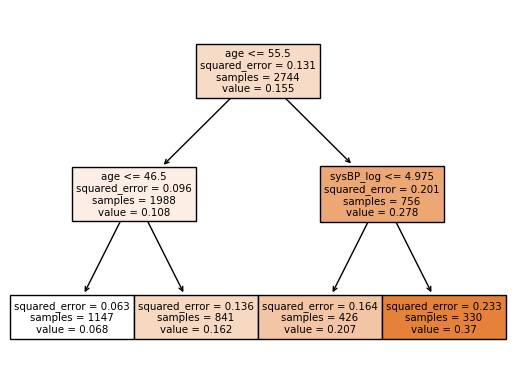

In [18]:
# Try making max_depth even lower instead of higher?

# Process data
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis = 1)
y_test = test_data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 2)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [19]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.05963970137419505


### Findings

Looks like setting max_depth = 3 had the highest R-squared value, while also showing us an accurate representation of the relationships between the data.

### Decision Tree - Round 2


After the initial round of experimenting with the decision tree models, it was found that the fit was lower than expected. To improve the fit of the model, another round of creating decision tree models was done, only focusing on the 4 variables mentioned earlier to have the highest correlation with the 10-year risk of coronary heart disease.

Again, there seemed to be great overfitting observed without the specification of a depth, so various depths were used again for experimentation to determine the model of best fit.

This method improved the fit of the model and seemed to be more accurate. The best R-squared value from this model was around 0.00691, observed at a depth of 3.

### Decision Tree

[Text(0.5642065762241663, 0.98, 'x[0] <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.3075006788691874, 0.94, 'x[0] <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.136512337071395, 0.9, 'x[2] <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.05555168212775951, 0.86, 'x[3] <= 4.016\nsquared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.0536728657820573, 0.82, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.05743049847346172, 0.82, 'x[3] <= 4.294\nsquared_error = 0.056\nsamples = 1065\nvalue = 0.059'),
 Text(0.025364020666979802, 0.78, 'x[0] <= 43.5\nsquared_error = 0.024\nsamples = 326\nvalue = 0.025'),
 Text(0.023485204321277594, 0.74, 'x[3] <= 4.193\nsquared_error = 0.031\nsamples = 252\nvalue = 0.032'),
 Text(0.010333489901362142, 0.7, 'x[0] <= 36.5\nsquared_error = 0.052\nsamples = 72\nvalue = 0.056'),
 Text(0.0037576326914044154, 0.66, 'x[2] <= 4.595\nsquared_error = 0.173\nsamples = 9\nval

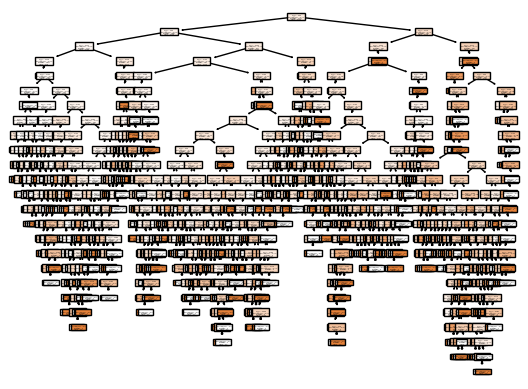

In [21]:
# Decision Tree
tree_data = data.loc[:, ['TenYearCHD', 'age', 'prevalentHyp', 'sysBP_log', 'diaBP_log']]
tree_test_data = test_data.loc[:, ['TenYearCHD', 'age', 'prevalentHyp', 'sysBP_log', 'diaBP_log']]
# Import packages and libraries
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Process data
y = tree_data['TenYearCHD']
X = tree_data.drop(['TenYearCHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)


# Fit tree
tree = DecisionTreeRegressor()
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True)

In [22]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.8840014361174036


This tree is very overfitting and is probably making splits on very small distinctions among a few observations, so we can truncate it and limit depth.

### Max Depth - 5

[Text(0.5371621621621622, 0.9166666666666666, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.2635135135135135, 0.75, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.10810810810810811, 0.5833333333333334, 'sysBP_log <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.05405405405405406, 0.4166666666666667, 'diaBP_log <= 4.016\nsquared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.02702702702702703, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.08108108108108109, 0.25, 'diaBP_log <= 4.294\nsquared_error = 0.056\nsamples = 1065\nvalue = 0.059'),
 Text(0.05405405405405406, 0.08333333333333333, 'squared_error = 0.024\nsamples = 326\nvalue = 0.025'),
 Text(0.10810810810810811, 0.08333333333333333, 'squared_error = 0.069\nsamples = 739\nvalue = 0.074'),
 Text(0.16216216216216217, 0.4166666666666667, 'diaBP_log <= 4.17\nsquared_error = 0.143\nsamples = 81\nvalue = 0.173'),
 Text(0.13513

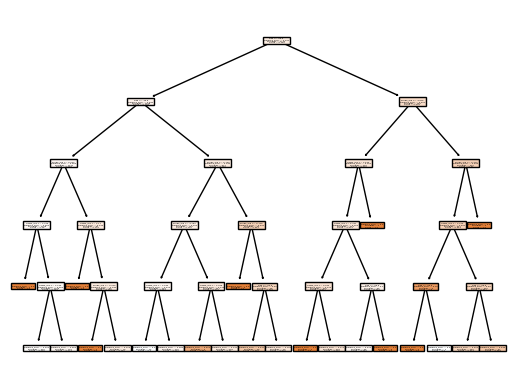

In [23]:
# Another Decision Tree, but with a limited depth

# Process data
y = tree_data['TenYearCHD']
X = tree_data.drop(['TenYearCHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 5)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [24]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.03427062916048207


### Max Depth - 3

[Text(0.5, 0.875, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.25, 0.625, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.125, 0.375, 'sysBP_log <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.0625, 0.125, 'squared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.1875, 0.125, 'squared_error = 0.143\nsamples = 81\nvalue = 0.173'),
 Text(0.375, 0.375, 'sysBP_log <= 5.109\nsquared_error = 0.136\nsamples = 841\nvalue = 0.162'),
 Text(0.3125, 0.125, 'squared_error = 0.125\nsamples = 780\nvalue = 0.146'),
 Text(0.4375, 0.125, 'squared_error = 0.231\nsamples = 61\nvalue = 0.361'),
 Text(0.75, 0.625, 'sysBP_log <= 4.975\nsquared_error = 0.201\nsamples = 756\nvalue = 0.278'),
 Text(0.625, 0.375, 'diaBP_log <= 4.593\nsquared_error = 0.164\nsamples = 426\nvalue = 0.207'),
 Text(0.5625, 0.125, 'squared_error = 0.162\nsamples = 424\nvalue = 0.203'),
 Text(0.6875, 0.125, 'squared_error = 0.0\nsamples = 2\n

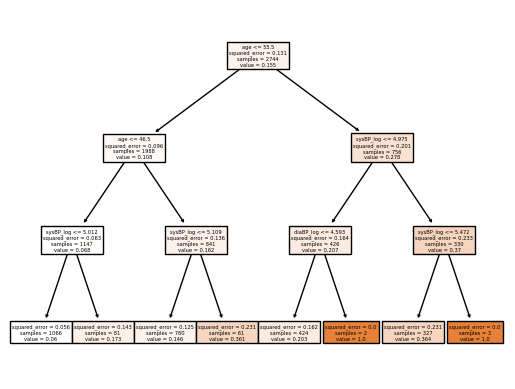

In [25]:
# Let's try to make it even better!

# Process data
y = tree_data['TenYearCHD']
X = tree_data.drop(['TenYearCHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 3)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [26]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.06911665623589058


### Max Depth - 10

[Text(0.6315854057591623, 0.9545454545454546, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.3953697643979058, 0.8636363636363636, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.22823952879581152, 0.7727272727272727, 'sysBP_log <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.12401832460732984, 0.6818181818181818, 'sysBP_log <= 4.434\nsquared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.11878272251308901, 0.5909090909090909, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.12925392670157068, 0.5909090909090909, 'diaBP_log <= 4.294\nsquared_error = 0.056\nsamples = 1065\nvalue = 0.059'),
 Text(0.06675392670157068, 0.5, 'age <= 43.5\nsquared_error = 0.024\nsamples = 326\nvalue = 0.025'),
 Text(0.061518324607329845, 0.4090909090909091, 'diaBP_log <= 4.193\nsquared_error = 0.031\nsamples = 252\nvalue = 0.032'),
 Text(0.028795811518324606, 0.3181818181818182, 'age <= 36.5\nsquared_error

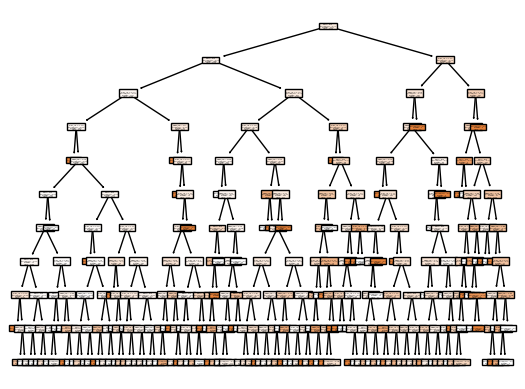

In [27]:
# Trying to improve r^2 value

# Process data
y = tree_data['TenYearCHD']
X = tree_data.drop(['TenYearCHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 10)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [28]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.18504307039513646


### Max Depth - 7

[Text(0.5193661971830986, 0.9375, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.2640845070422535, 0.8125, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.12323943661971831, 0.6875, 'sysBP_log <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.06338028169014084, 0.5625, 'diaBP_log <= 4.016\nsquared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.04929577464788732, 0.4375, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.07746478873239436, 0.4375, 'diaBP_log <= 4.294\nsquared_error = 0.056\nsamples = 1065\nvalue = 0.059'),
 Text(0.04225352112676056, 0.3125, 'age <= 43.5\nsquared_error = 0.024\nsamples = 326\nvalue = 0.025'),
 Text(0.028169014084507043, 0.1875, 'diaBP_log <= 4.193\nsquared_error = 0.031\nsamples = 252\nvalue = 0.032'),
 Text(0.014084507042253521, 0.0625, 'squared_error = 0.052\nsamples = 72\nvalue = 0.056'),
 Text(0.04225352112676056, 0.0625, 'squared_error = 0.022\nsample

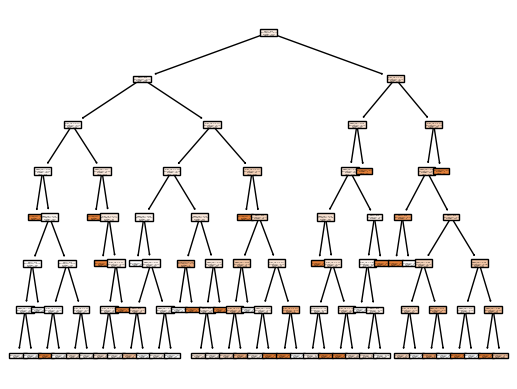

In [29]:
# Trying again

# Process data
y = tree_data['TenYearCHD']
X = tree_data.drop(['TenYearCHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 7)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [30]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.04547055574846248


### Max Depth - 2

[Text(0.5, 0.8333333333333334, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.25, 0.5, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.136\nsamples = 841\nvalue = 0.162'),
 Text(0.75, 0.5, 'sysBP_log <= 4.975\nsquared_error = 0.201\nsamples = 756\nvalue = 0.278'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.164\nsamples = 426\nvalue = 0.207'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.233\nsamples = 330\nvalue = 0.37')]

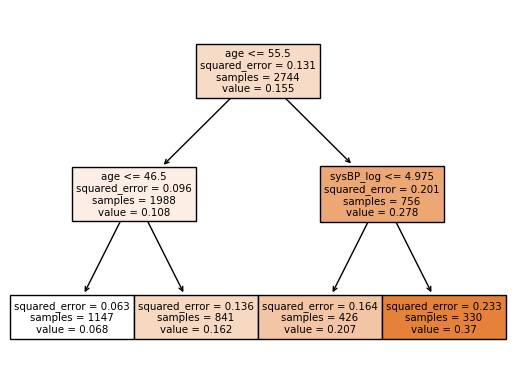

In [31]:
# Try making max_depth even lower instead of higher?

# Process data
y = tree_data['TenYearCHD']
X = tree_data.drop(['TenYearCHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 2)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [32]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.05963970137419505


### Findings

Looks like even if we just focus on the variables with the highest correlations, setting max_depth = 3 had the highest R-squared value, while also showing us a more accurate representation of the relationships between the data than the previous set of decision tree models did.